# Regresión Lineal y Correlación

En este ejemplo se cargara un archivo .csv llamado articulos_ml que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios importantes. Luego se realizara un análisis de los datos para obtener una conclusión de los mismos.

Nota: el archivo .csv contiene la mitad de datos reales, y la otra mitad generados de manera aleatoria, por lo que las predicciones que obtendremos no serán reales.

In [1]:
#Importa las librerias de trabajo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import _cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Carga los datos de entrada
data = pd.read_csv('articulos_ml.csv')
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


### Contenido dataframe
El dataframe esta constituido por 161 filas y 8 columnas, las cuales son:

* 'Title': titulo del artículo.
* 'url': ruta al artículo.
* 'Word count': la cantidad de palabras del artículo.
* '# of Links': número de enlaces externos que contiene el artículo.
* '# of comments': número de comentarios sobre el artículo.
* '# Images video': número de imagenes y videos que contiene el artículo.
* 'Elapsed days': cantidad de días  que transcurrieron desde la creación del artículo a la carga de los datos.
* '# Shares': número de veces que se compartio el artículo.

In [3]:
#Muestra la cantidad de datos nulos por columna
data.isnull().sum()

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

In [4]:
# Crea una variable nueva que contiene las filas con valores nulos
filas_con_nulos = data[data.isnull().any(axis=1)]
filas_con_nulos.head(5)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000


Se concluye que los valores NaN de la fila 'url' indican que el articulo no tiene url de referencia, confirmandose por la falta de comentarios. Sin embargo, algunos artículos si tienen comentarios pero no una url, se considera como información incompleta.

In [5]:
# Muestra la descripción estadistica de las columnas númericas del dataframe
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Podemos ver que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401. A continuación, se utilizara la relación lineal, para ver si hay una correlación entre la cantidad de palabras del texto y la cantidad de compartidos obtenidos.

C:\Users\Electro\AppData\Local\Temp\ipykernel_22668\1933719412.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop(['Title','url','Elapsed days'],1)


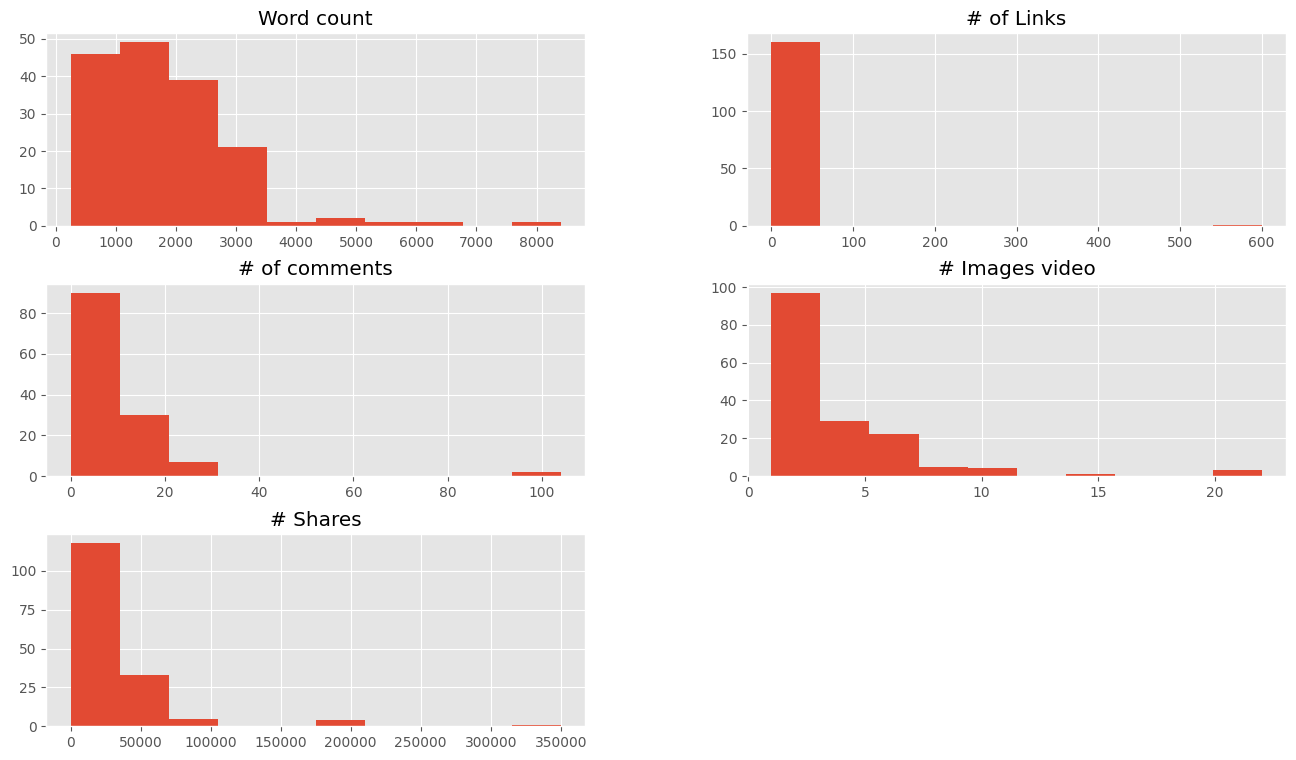

In [6]:
df = data.drop(['Title','url','Elapsed days'],1)
df.hist()
plt.show()

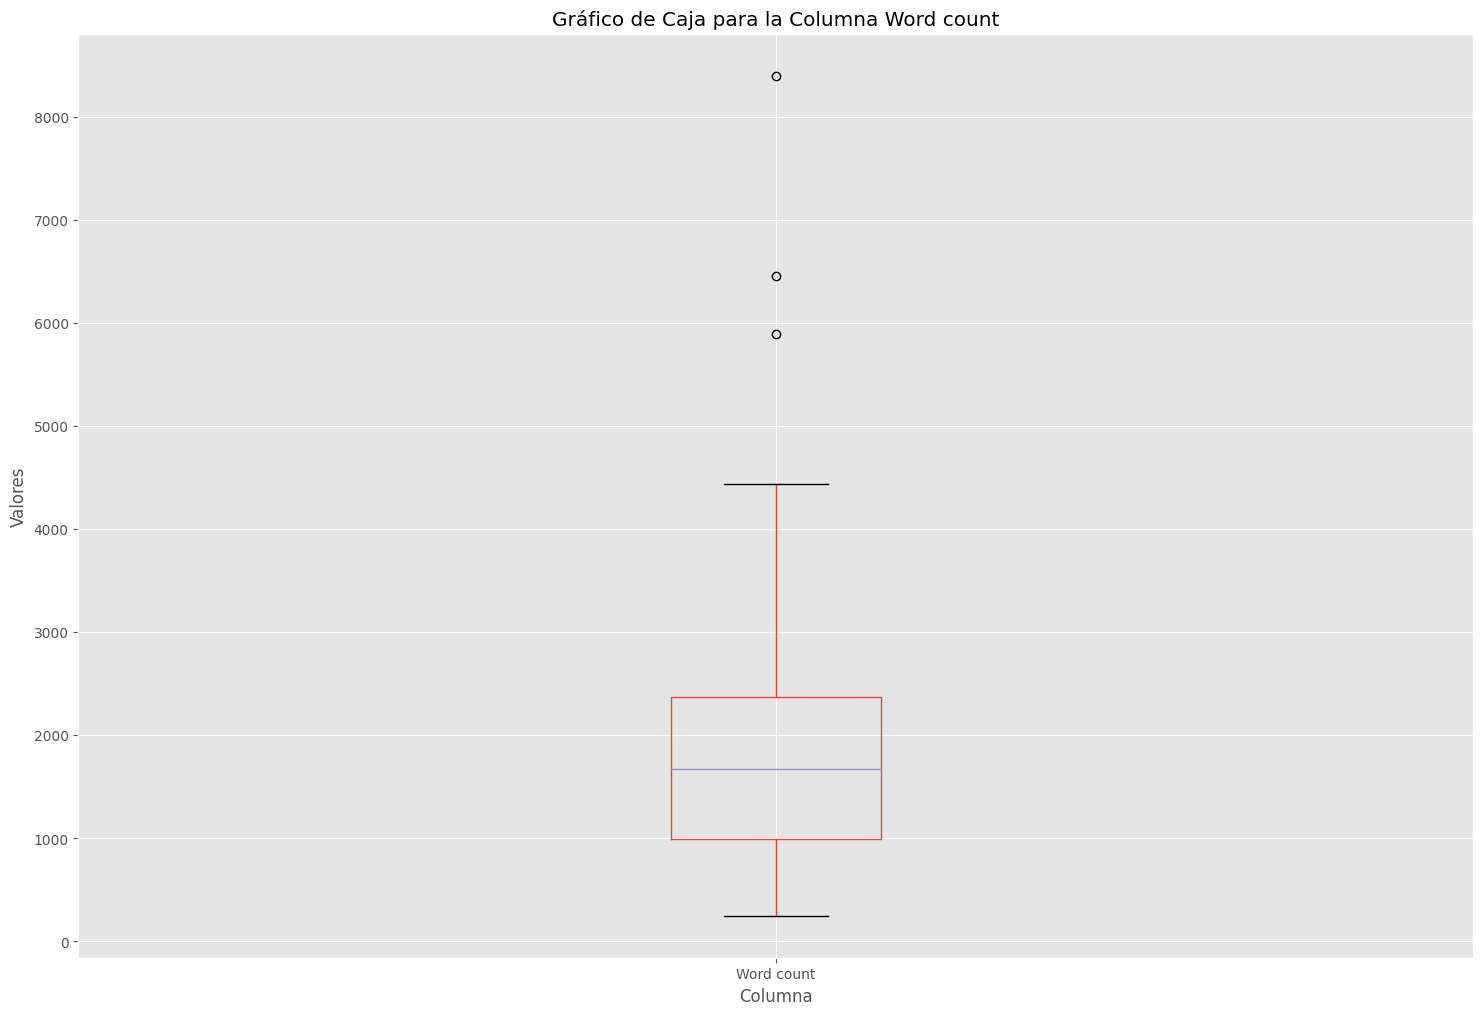

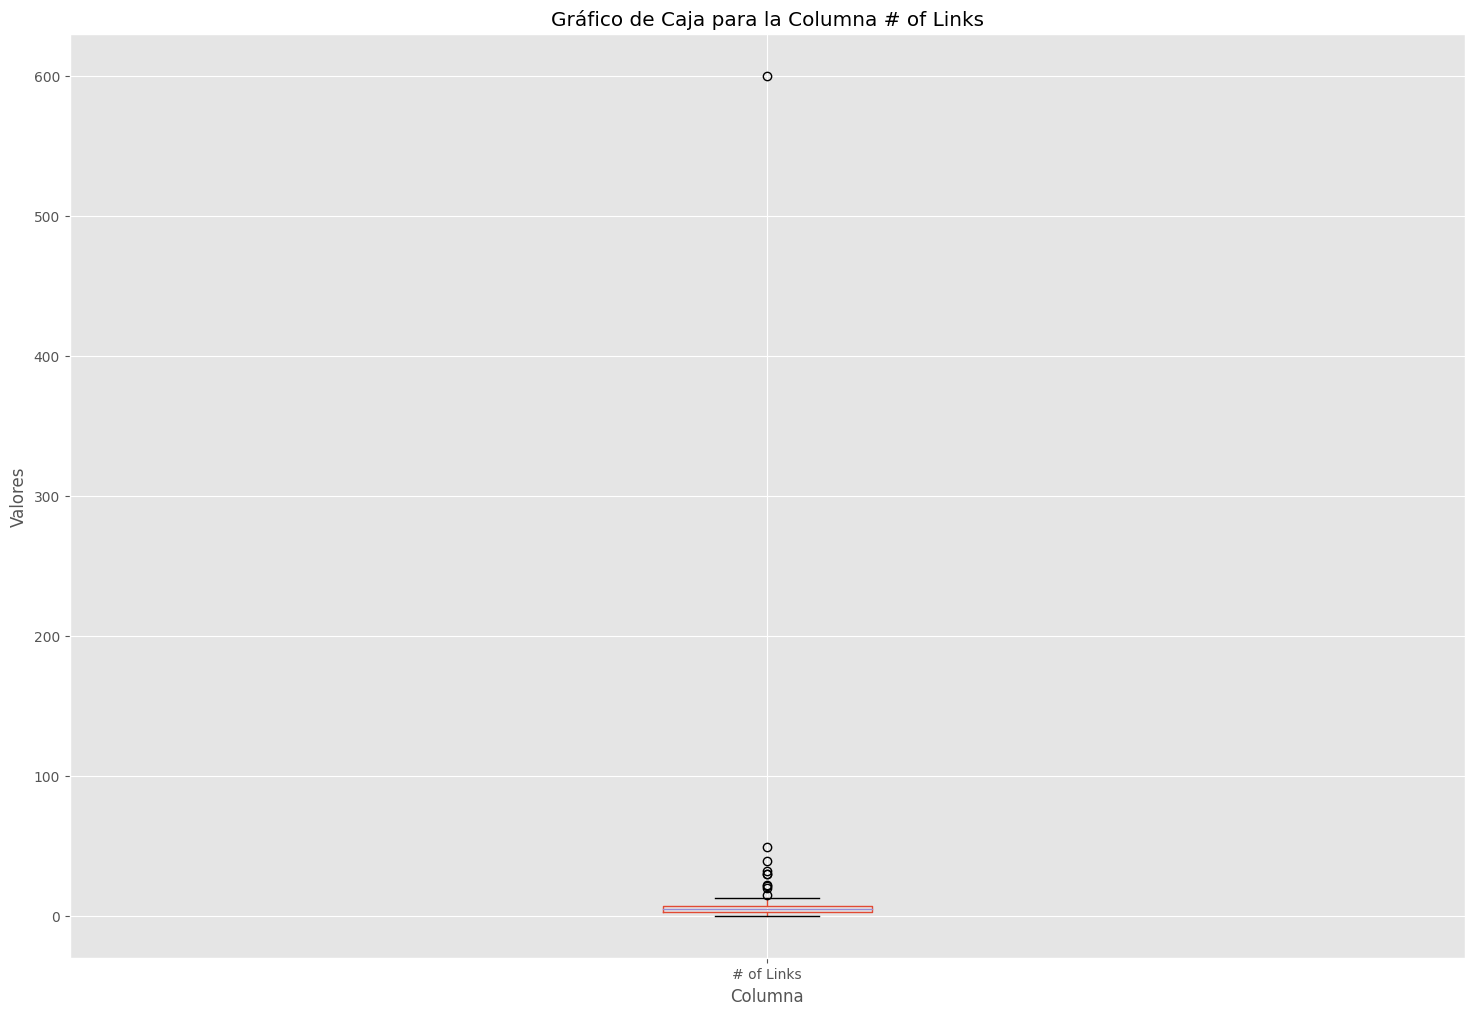

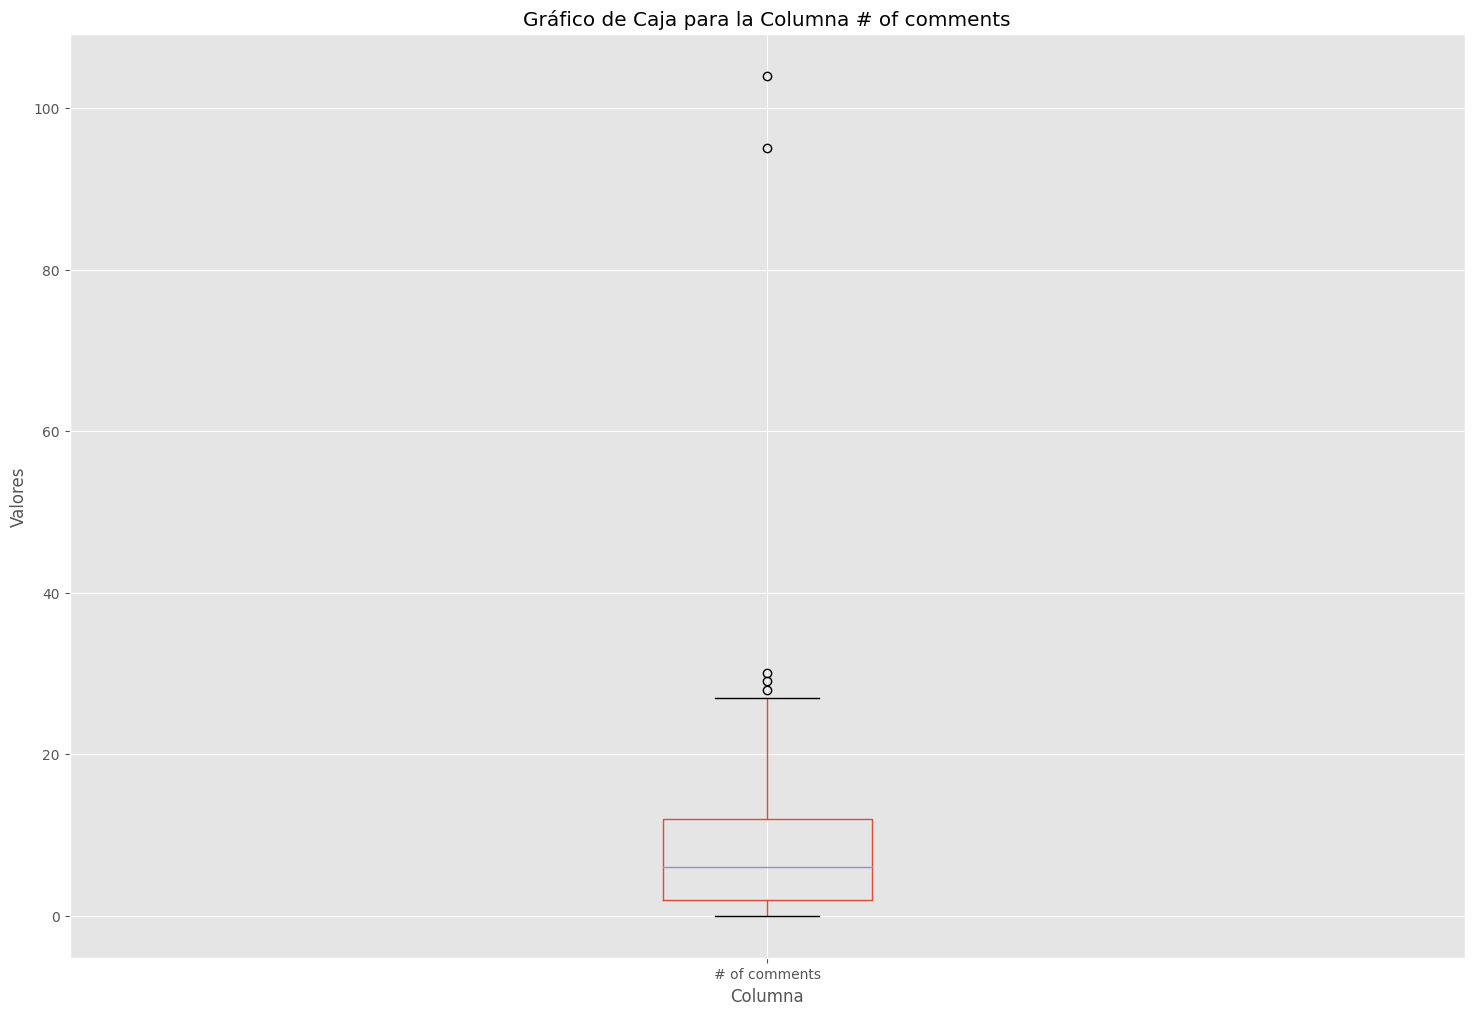

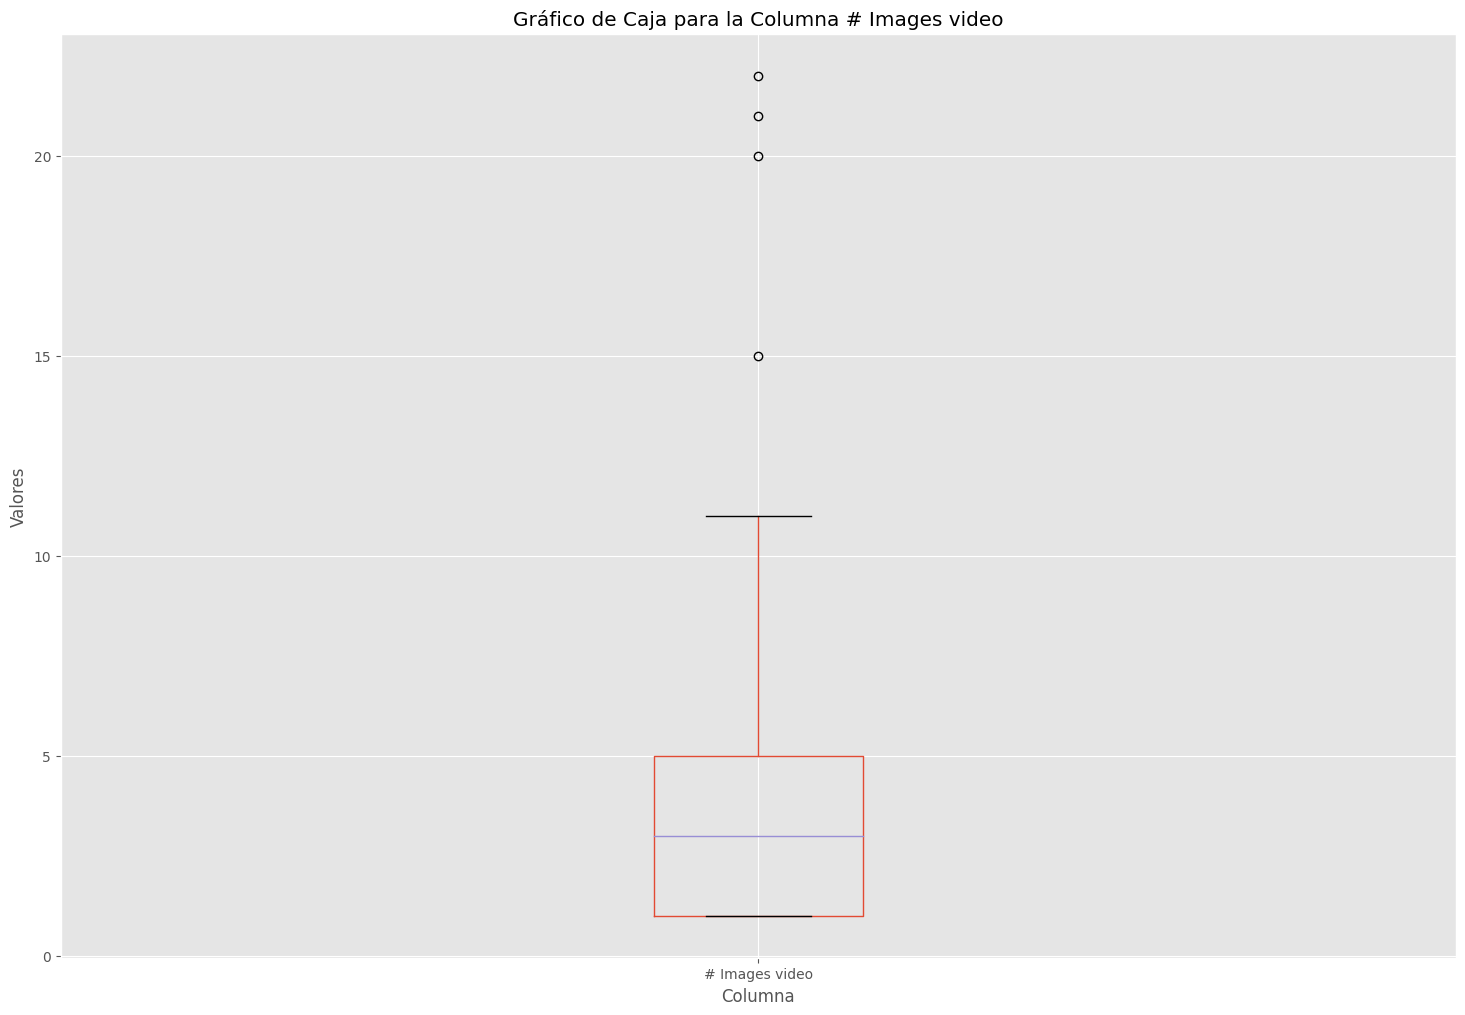

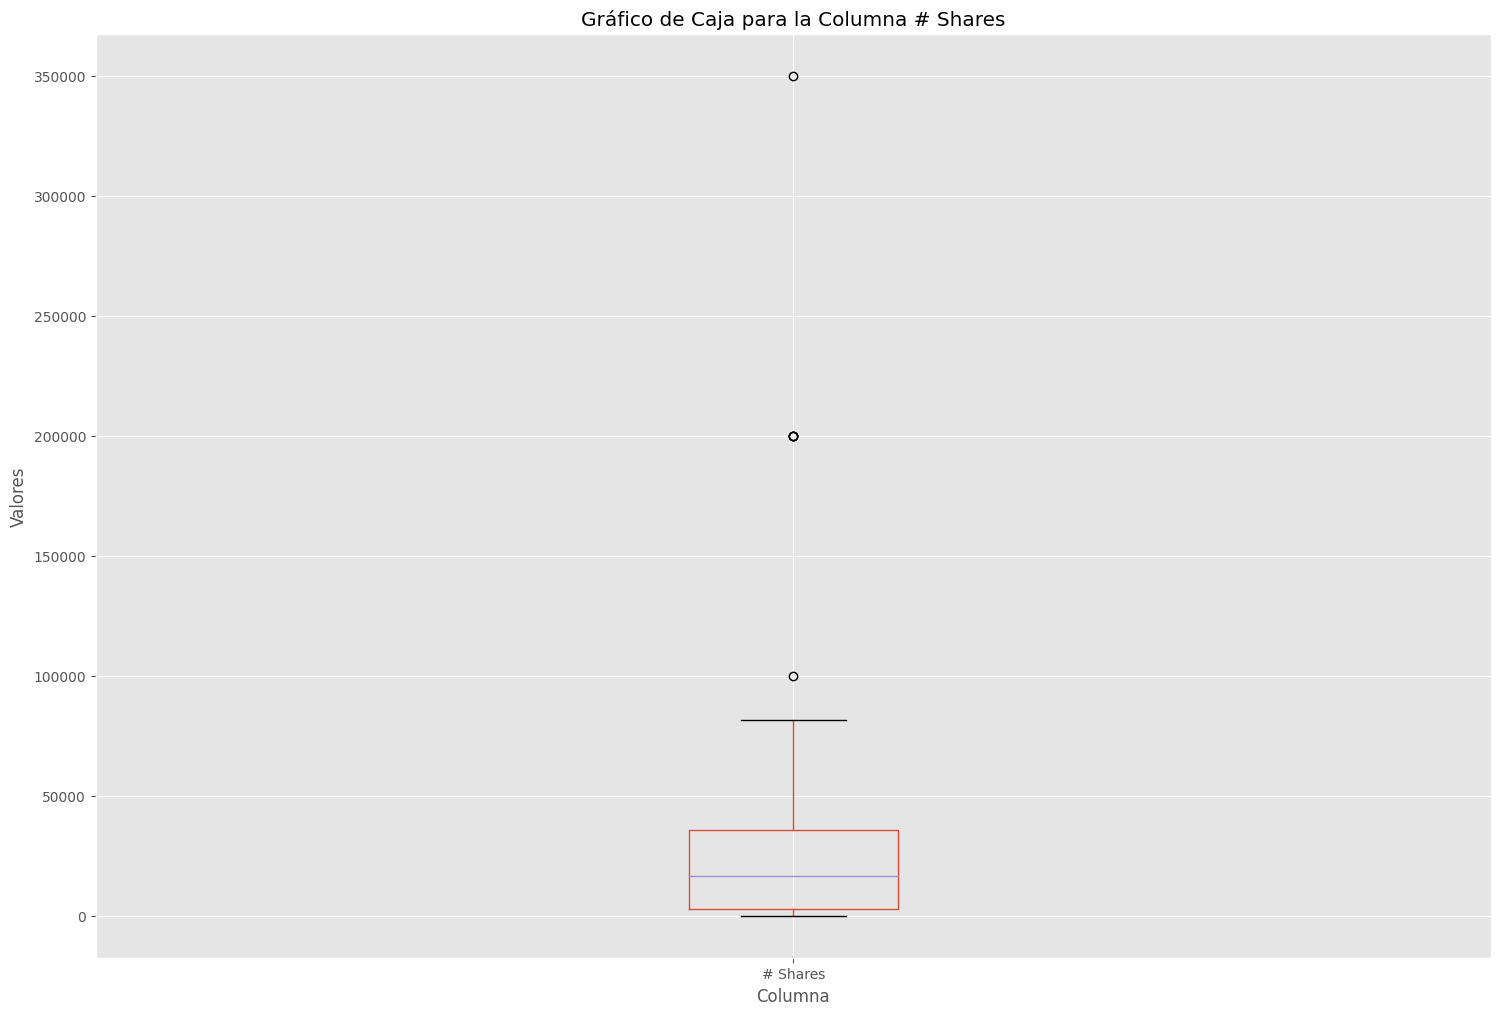

In [7]:
# Iterar sobre cada columna numérica y crear un gráfico de caja individual
for column in df.columns:
    plt.figure(figsize=(18, 12))  
    df.boxplot(column=column)
    plt.title(f'Gráfico de Caja para la Columna {column}')
    plt.xlabel('Columna')
    plt.ylabel('Valores')
    plt.show()

Con estas gráficas se puede observar que los valores se concentran en ciertos intervalos. A continuación, se filtraran los datos de cantidad de palabras obteniendo solo los registros con menos de 3500 palabras y también se filtrara aquellos que tengan menos de 80000 compartidos. Además, se graficara pintando de azul los puntos con menos de 1808 palabras (media) y en naranja los que tengan más.

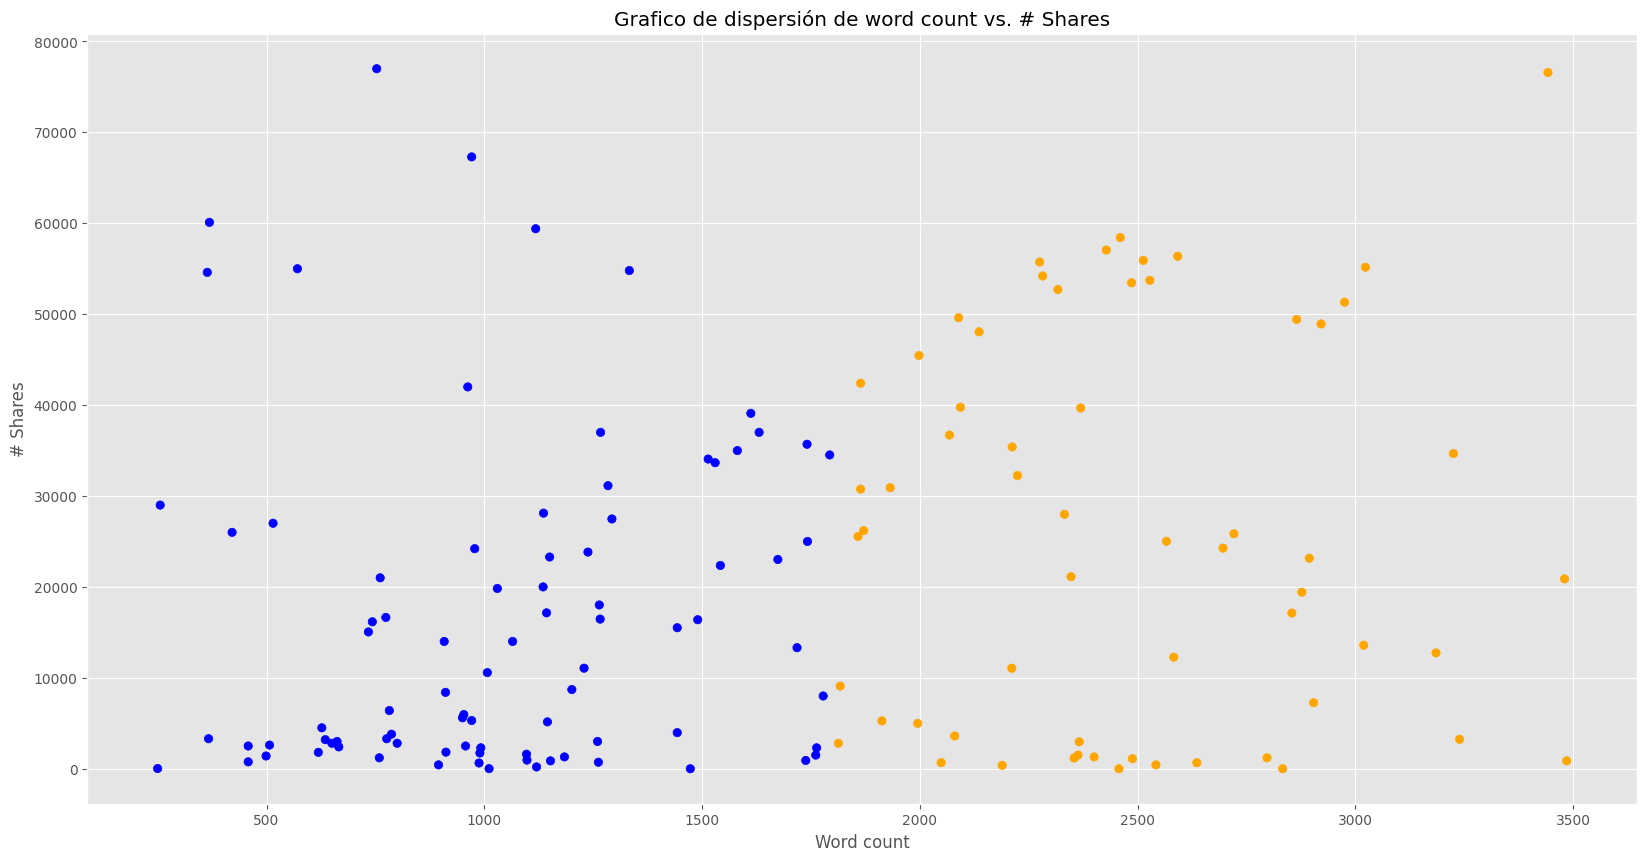

In [8]:
# Filtrar el dataframe
data_filtro = df[(df['Word count'] <= 3500) & (df['# Shares'] <= 80000)]

# Definir colores y tamaños
colores = ['orange', 'blue']

#Obtener los valores para los ejes x e y
f1 = data_filtro['Word count'].values
f2 = data_filtro['# Shares'].values

# Asignar colores a la función del 'Word count'
asignar = ['orange' if row['Word count'] > 1808 else 'blue' for index, row in data_filtro.iterrows()]

# Crear grafico de dispersión
plt.figure(figsize=(20,10))
plt.scatter(f1, f2, c=asignar)
plt.title('Grafico de dispersión de word count vs. # Shares')
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

Existe una pequeña tendencia de que 'y' se incrementa a medida que 'x' lo hace. Es decir, los valores grandes de 'Word count' tienden a asociarse con valores grandes de '# Shares', una relación positiva entre las variables.

A continuación, se procedera a entrenar el modelo y finalmente se imprimiran los coeficientes obtenidos.

In [9]:
# Se asigna X como variable de entrada para entrenamiento y la variable Y para las etiquetas.
dataX = data_filtro[['Word count']]
x_train = np.array(dataX)
y_train = data_filtro['# Shares'].values

# Crea el objeto de Regresión Lineal
regresion = linear_model.LinearRegression()

# Entrena el modelo
regresion.fit(x_train, y_train)

# Hace las predicciones, dibujando una línea
y_pred = regresion.predict(x_train)

# Muestra los coeficientes obtenido
print('Coeficiente: ', regresion.coef_)
# Valor donde corta el eje Y (X=0)
print('Termino independiente: ', regresion.intercept_)
# Error cuadratico medio
print('Error cuadratico medio: %.2f' % mean_squared_error(y_train, y_pred))
# Varianza
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente:  [5.69765366]
Termino independiente:  11200.30322307416
Error cuadratico medio: 372888728.34
Varianza: 0.06


<function matplotlib.pyplot.show(close=None, block=None)>

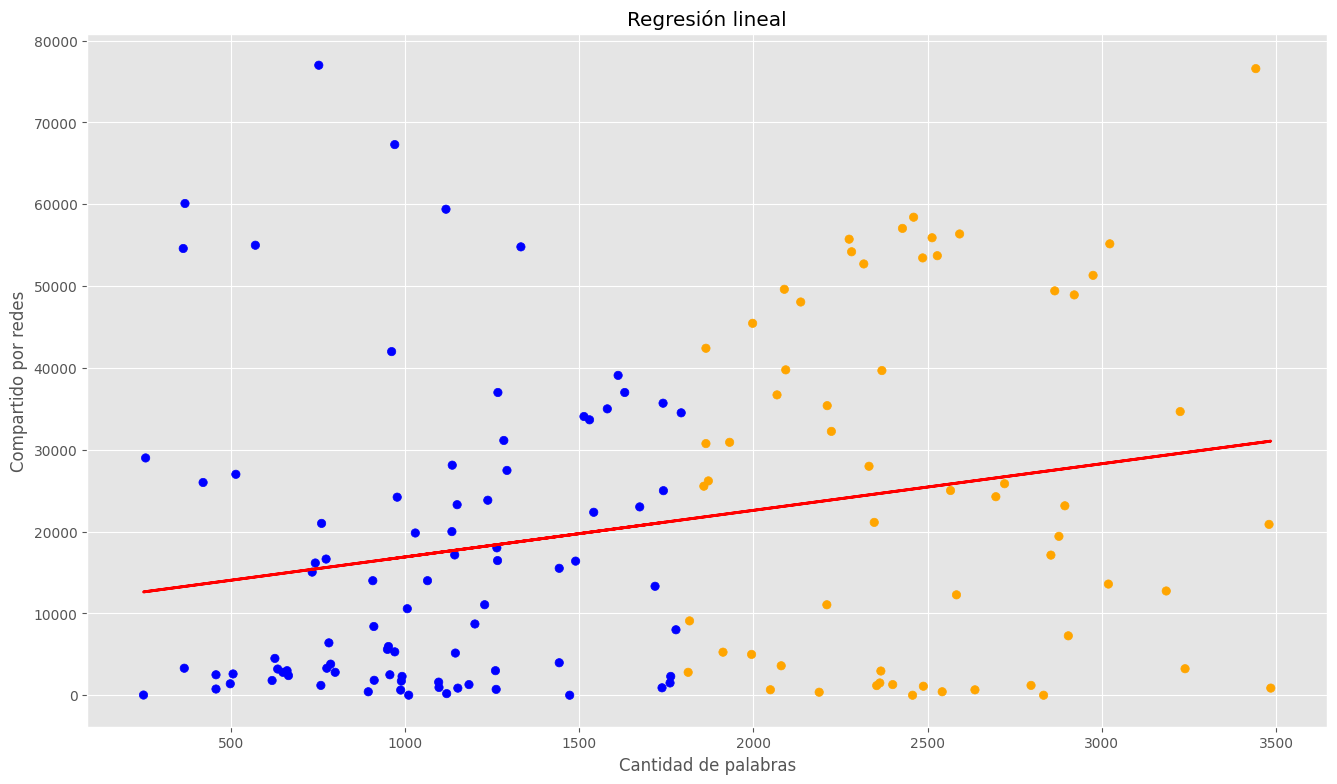

In [10]:
plt.scatter(x_train[:,0], y_train, c=asignar)
plt.plot(x_train[:,0], y_pred, color='red', linewidth=2)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartido por redes')
plt.title('Regresión lineal')
plt.show

### Interpretación de Resultados

1. Coeficiente: El coeficiente de 5.69765366 sugiere que por cada palabra adicional en una publicación, se espera que la cantidad de veces que se comparte aumente en aproximadamente 5.7 veces, manteniendo todas las demás variables constantes.

2. Término independiente: El valor del término independiente 11200.30322307416. Este es el valor de la cantidad de veces compartida cuando la cantidad de palabras es 0. Aunque en la práctica, una publicación con 0 palabras no tiene sentido.

3. Error Cuadrático Medio: El error cuadrático medio de 372888728.34 indica el promedio de los errores cuadrados entre las predicciones y los valores reales. Un valor más bajo del MSE indica un mejor ajuste del modelo a los datos, aunque en este caso el valor es bastante alto, lo que sugiere que el modelo no está ajustando muy bien los datos.

4. Varianza (R^2): El valor de varianza de 0.06 indica que solo el 6% de la variabilidad en la cantidad de veces que se comparte la publicación puede ser explicada por la cantidad de palabras. Esto sugiere que el modelo no es un buen predictor y que hay otros factores importantes que no se estan considerando.

A continuación, se probara el algoritmo, se supondra como ejemplo querer saber cuántos "compartir" obtendrá un articulo sobre Machine Learning de 2000 palabras.

In [11]:
y_dosmil = regresion.predict([[2000]])
print(int(y_dosmil))

22595


### Conclusión

El análisis de regresión linela realizado indica que la cantidad de palabras en una publicación tiene una influencia limitada en la cantidad de veces qeu se comparte en redes sociales. La baja varianza sugiere que otros factores no incluidos en el modelo pueden ser mucho más importantes para determinar la cantidad de veces que una publicación es compartida.

## Correlación

In [12]:
corre = df.corr()
corre

,Word count,# of Links,# of comments,# Images video,# Shares
Word count,1.000000,0.346730,0.108730,0.463767,0.141736
# of Links,0.346730,1.000000,0.116415,0.021087,0.288325
# of comments,0.108730,0.116415,1.000000,0.018377,0.437413
# Images video,0.463767,0.021087,0.018377,1.000000,0.062170
# Shares,0.141736,0.288325,0.437413,0.062170,1.000000


<Axes: >

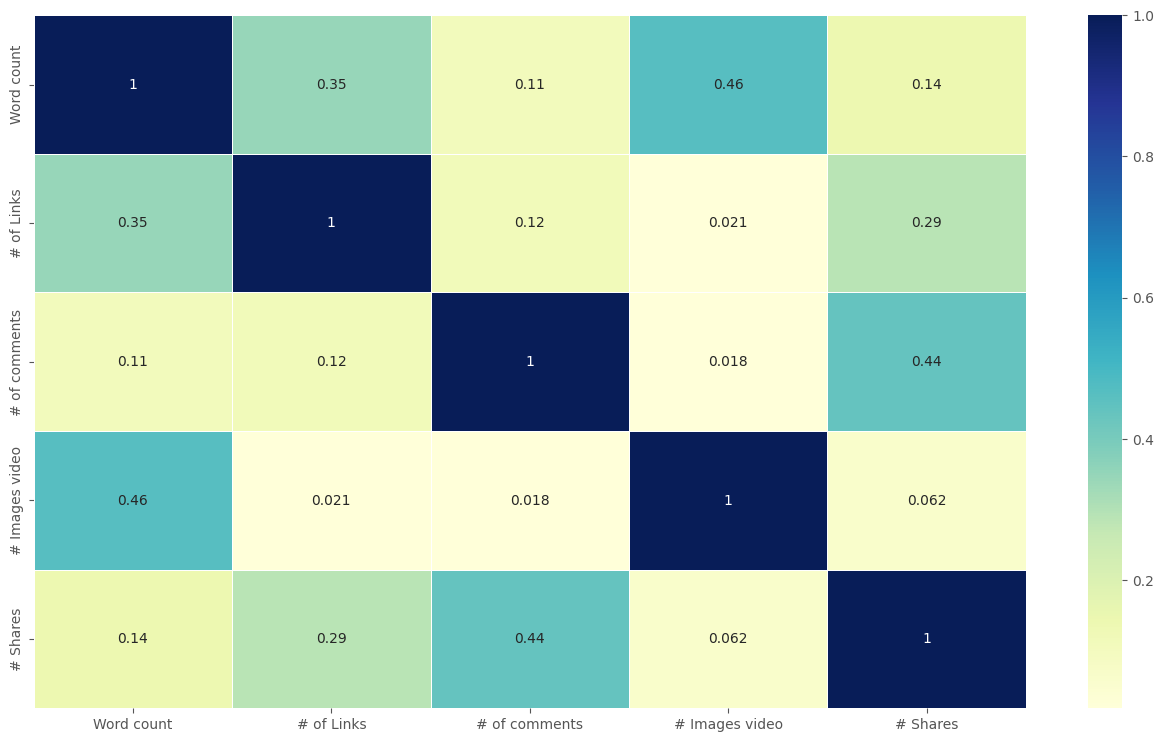

In [13]:
sns.heatmap(corre, linewidths=.5,cmap="YlGnBu", annot=True)

Los valores de la matriz correlación varían entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica que no hay correlación.
A continuación, se describe la correlación entre las variables:

1. Word count (Recuento de palabras)

    * Tiene una correlación positiva moderada con el número de enlaces (0.35)
    * Corralación baja con el número de comentarios (0.11).
    * Correlación moderada con el número de imágenes/videos (0.46).
    * Correlación baja con el número de comparticiones (0.14).

2. of Links (Número de enlaces)

    * Correlación positiva moderada con el recuento de palabras (0.35).
    * Correlación baja con el número de comentarios (0.12).
    * Correlación baja con el número de imágenes/videos (0.021).
    * Correlación moderada con el número de comparticiones (0.44).

3. of Comments (Número de comentarios)

    * Correlación baja con el recuento de palabras (0.11).
    * Correlación baja con el número de enlaces (0.12).
    * Correlación muy baja con el número de imágenes/videos (0.018).
    * Correlación moderada con el número de comparticiones (0.44).

4. of Images/videos (Número de imágenes/videos)

    * Correlación moderada con el recuento de palabras (0.46).
    * Correlación baja con el número de enlaces (0.021).
    * Correlación muy baja con el número de comentarios (0.018).
    * Correlación baja con el número de comparticiones (0.062).

5. of Shares (Número de comparticiones)

    * Correlación baja con el recuento de palabras (0.14).
    * Correlación moderada con el número de enlaces (0.29).
    * Correlación moderada con el número de comentarios (0.44).
    * Correlación baja con el número de imágenes/videos (0.062).

### Interpretación

* Las correlaciones más altas se observan entre el recuento de palabras y el número de imágenes/videos (0.46), y entre el número de comentarios y el número de comparticiones (0.44). Esto sugiere que los artículos con más palabras tienden a incluir más imágenes/videos, y que un mayor número de comentarios está asociado con un mayor número de comparticiones.

* Las correlaciones bajas entre otras variables indican que no hay una relación fuerte entre ellas. Por ejemplo, el número de enlaces tiene una correlación muy baja con el número de imágenes/videos (0.021).

## Regresión lineal múltiple en Python

Ahora se utilizaran más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pudiendo obtenerse predicciones más complejas.
En este caso, utilizaremos 2 "variables predictivas". La primer variable seguira siendo la cantidad de palabras y la segunda variable la crearemos artificialmente y será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes. 

In [14]:
# Crea una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (data_filtro['# of Links'] + data_filtro['# of comments'].fillna(0) + data_filtro['# Images video'])

dataX2 = pd.DataFrame()
dataX2['Word count'] = data_filtro['Word count']
dataX2['suma'] = suma
XYtrain = np.array(dataX2)
z_train = data_filtro['# Shares'].values

Ya tenemos 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser 'Y' a ser el eje 'Z'.

In [15]:
# Crea el nuevo objeto de Regresión Lineal
regresion2 = linear_model.LinearRegression()

# Entrenamos el nuevo modelo con 2 dimensiones
# Obtendremos 2 coeficientes para graficar el plano
regresion2.fit(XYtrain, z_train)

# Hace la prediccion para obtener los puntos sobre el plano
z_pred = regresion2.predict(XYtrain)

# Muestra los coeficientes obtenido
print('Coeficiente: ', regresion2.coef_)
# Error cuadratico medio
print('Error cuadratico medio: %.2f' % mean_squared_error(z_train, z_pred))
# Varianza
print('Varianza: %.2f' % r2_score(z_train, z_pred))

Coeficiente:  [   6.63216324 -483.40753769]
Error cuadratico medio: 352122816.48
Varianza: 0.11


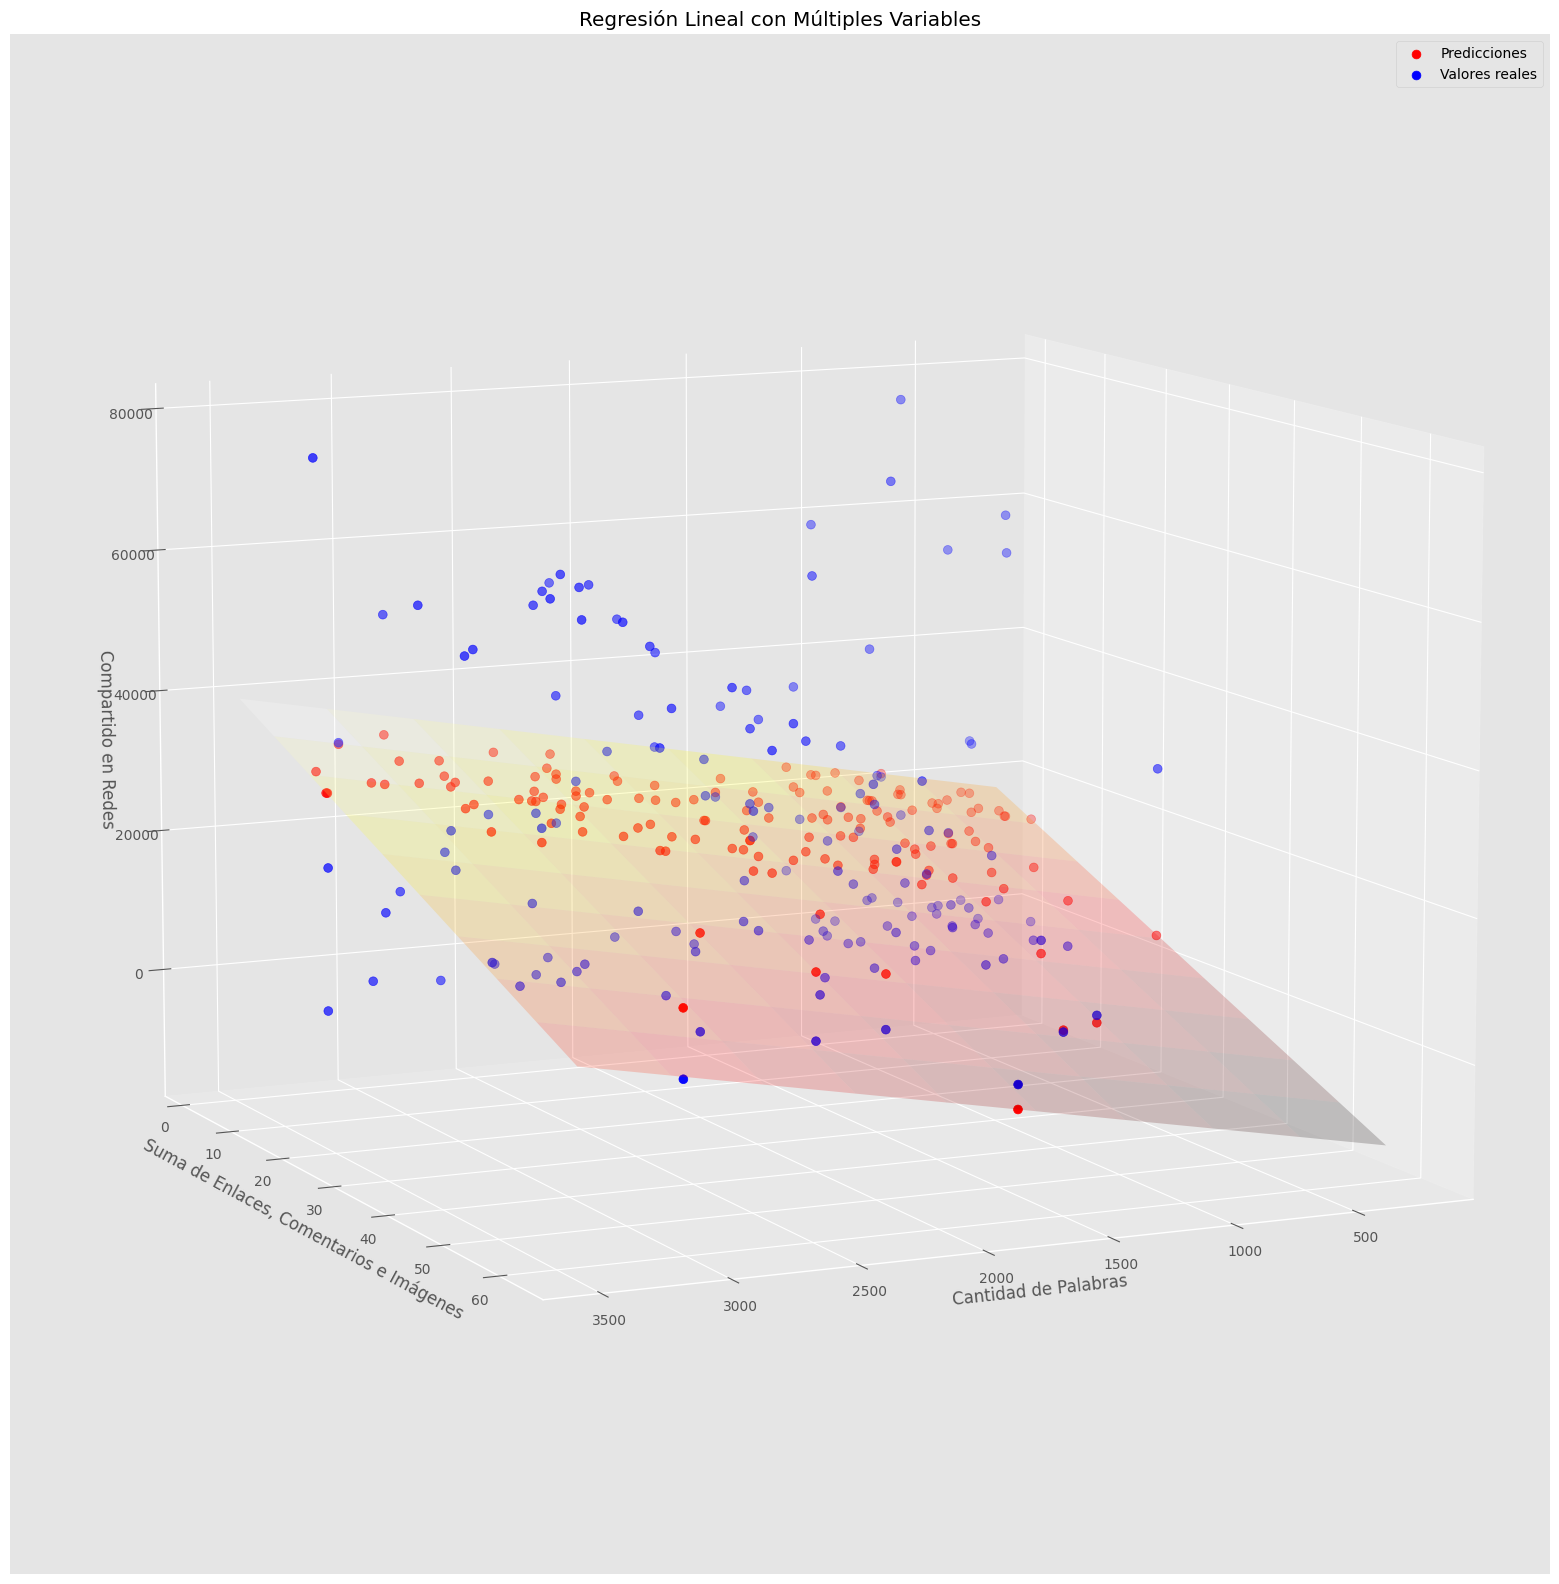

In [27]:
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')

# Crear la malla sobre la cual graficar el plano
xx, yy = np.meshgrid(np.linspace(dataX2['Word count'].min(), dataX2['Word count'].max(), num=10),
                     np.linspace(dataX2['suma'].min(), dataX2['suma'].max(), num=10))

# Calcular los puntos para el plano
w = regresion2.coef_[0] * xx
a = regresion2.coef_[1] * yy

# Calcular los correspondientes valores para z. Sumar el punto de intercepción
z = w + a + regresion2.intercept_

# Graficar el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficar los puntos de entrenamiento y predicciones
ax.scatter(XYtrain[:, 0], XYtrain[:, 1], z_pred, c='red', s=40, label='Predicciones')
ax.scatter(XYtrain[:, 0], XYtrain[:, 1], z_train, c='blue', s=40, label='Valores reales')

# Configurar la vista de la cámara
ax.view_init(elev=10, azim=65)

# Etiquetas y título
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Suma de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
ax.legend()

# Mostrar el gráfico
plt.show()

A continuación, se realizara una predicción para saber cuantos compartidos tendra un artículo de 2000 palabras.

In [21]:
z_Dosmil = regresion2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


## Comparación de predicciónes

In [22]:
# Resta los errores calculados antes
mejora_error = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(int(mejora_error))

20765911


In [24]:
# Calcula la mejora en la varianza
mejora_varianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejora_varianza)

0.052615337462582956


In [26]:
# Calcula la diferencia de shares para 2000 palabras
dif_shares = y_dosmil - z_Dosmil
print(int(dif_shares))

2077


# Conclusión Final

Si bien al usar mas variables el error cuadratico medio y la varianza mostraron mejores resultados, aún estan lejos de los valores optimos. Por lo que el no se pueden tomar conclusiones acertadas del modelo planteado.